In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [3]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01,num_iterations=1000):
        self.learning_rate=learning_rate 
        self.num_iterations=num_iterations 
        self.theta=None

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def fit(self,X,y):
        self.theta = np.zeros(X.shape[1]) 
        m=X.shape[0]

        for i in range(self.num_iterations):
            z=np.dot(X,self.theta) 
            h=self.sigmoid(z)
            
            cost = (-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h)) 
            grad = (1/m)*np.dot(X.T,(h-y))

            self.theta -= self.learning_rate*grad
            
            if i%100==0:
                print("iteration {}: Cost={}".format(i,cost))
    def predict(self,X): 
        z=np.dot(X,self.theta) 
        h=self.sigmoid(z) 
        y_pred=np.round(h).astype(int) 
        return y_pred

In [5]:
data = load_iris() 
X=data.data 
y=data.target

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression(learning_rate=0.01,num_iterations=1000) 
model.fit(X_train,y_train)

iteration 0: Cost=0.6931471805599453
iteration 100: Cost=-0.28592081322953067
iteration 200: Cost=-0.7717750516170782
iteration 300: Cost=-1.1568547886326461
iteration 400: Cost=-1.5078154119251628
iteration 500: Cost=-1.8434697875951882
iteration 600: Cost=-2.170888203543444
iteration 700: Cost=-2.4932756898070134
iteration 800: Cost=-2.8123041543115193
iteration 900: Cost=-3.1289458088636195


In [10]:
y_pred = model.predict(X_test)

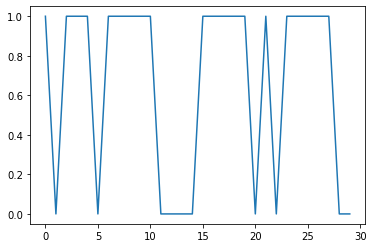

In [12]:
y_pred
plt.plot(y_pred)

In [13]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
